# Honda vs MuFit including VHE

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle

In [2]:
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import Normalize
mpl.rcParams['figure.dpi']= 150
import CBcm

In [3]:
import jp_mpl as jplot

In [4]:
import scipy

In [5]:
import sys, os
sys.path.append('/home/jp/projects/ipython_notebooks/MCEq/prd_paper_2021/ddm_plots')

In [6]:
from references import SuperK2015, Honda2015, Bartol2004
hkkms2015 = Honda2015(location="SouthPole")

In [7]:
import sys
from scipy.interpolate import fitpack2
sys.modules['scipy.interpolate._fitpack2'] = sys.modules['scipy.interpolate.fitpack2']

In [8]:
sys.path.append('/home/jp/projects/atm_nu/mceq_tysak/muon_fit/modules')

In [9]:
outdir = '/home/jp/projects/atm_nu/ddm_results/neutrino_results'

In [10]:
import mceq_fastflux as mceq

In [11]:
flux = mceq.MCEq_fastflux(flux_tables='daemon-v3')

Using MCEq jacobians:
  daemonsplines_20230207_nousertab.pkl
Opening in V7+ format
Adjusting DEIS name


In [12]:
angles_id = np.array(list(flux.fl_spl['IceCube'].keys()))

angles = np.array(angles_id, dtype=float)
sort_indices = np.argsort(angles)[::-1]

angles = angles[sort_indices]
angles_id = angles_id[sort_indices]
coszen = np.cos(np.deg2rad(angles))
loge = np.logspace(0.5, 4, 11)

In [13]:
flux.get_flux_new(loge,
                  'IceCube',
                  angles_id[0],
                  'numuflux',
                  {},
                 True)

array([0.04253064, 0.04148323, 0.04013674, 0.03865668, 0.03547554,
       0.03216293, 0.02822883, 0.02287569, 0.01647196, 0.0106707 ,
       0.00641006])

In [14]:
# My results
# Final result
filename = '/home/jp/projects/atm_nu/ddm_results/daemon_prd_nd.pkl'
data = pickle.load(open(filename,'rb'), encoding='latin1')


In [15]:
test_params = {}
for one_phys in data['flux_parameters']:
    test_params[one_phys] = data['params'][one_phys]['value']
test_params

{'K+_2P': 6.649033606177692,
 'p_2P': 5.221097120603321,
 'pi-_158G': 2.7278602118225166,
 'pi+_2P': -2.633981417934515,
 'K-_2P': -22.831365923634664,
 'K-_31G': -0.2140275746304372,
 'n_158G': 1.0402502189023153,
 'pi+_31G': -1.513570350033941,
 'K+_158G': 0.48017323249413657,
 'K-_158G': 0.013671042208274642,
 'pi-_20T': 4.517265212679412,
 'pi+_158G': -0.11673523839468558,
 'p_158G': -0.11548263308514173,
 'GSF_4': 0.19104638297665133,
 'GSF_5': -0.7891544414512803,
 'GSF_6': 0.2656034053162788,
 'GSF_1': 1.0833353934914385,
 'GSF_2': 0.12063348318210565,
 'GSF_3': 0.0448165178219746,
 'K+_31G': -1.0757561019377029,
 'pi+_20T': -3.317775925726352e-05,
 'pi-_31G': -2.3423855029531406,
 'pi-_2P': 9.601061340565884,
 'n_2P': 2.214832119760679}

In [16]:
def get_fluxes(flavor, coszen, loge):
    honda = np.zeros([loge.size, coszen.size])
    myflux = np.zeros_like(honda)
    default = np.zeros_like(myflux)
    for i, cos in enumerate(coszen):
        for j, energy in enumerate(loge):
            honda[j, i] = hkkms2015.spectrum(cos,flavor)[1][hkkms2015.nearest_energy_idx(energy)[0]]*energy**3
            myflux[j,i] = flux.get_flux_new(loge[j],
                                            'IceCube',
                                            angles_id[i],
                                            flavor,
                                            test_params,
                                            True)
            default[j,i] = flux.get_flux_new(loge[j],
                                            'IceCube',
                                            angles_id[i],
                                            flavor,
                                            {},
                                            True)
    return honda, myflux, default

In [17]:
cos= -0.05
flavor='antinue'
energy=5.6
hkkms2015.spectrum(cos,flavor)[1][hkkms2015.nearest_energy_idx(energy)[0]]*10**4

0.9340300000000001

In [18]:
honda ={}
myflux = {}
default = {}
honda['nue'], myflux['nue'], default['nue'] = get_fluxes('nue',coszen, loge)
honda['antinue'], myflux['antinue'], default['antinue'] = get_fluxes('antinue',coszen, loge)
honda['numu'], myflux['numu'], default['numu'] = get_fluxes('numu',coszen, loge)
honda['antinumu'], myflux['antinumu'], default['antinumu'] = get_fluxes('antinumu',coszen, loge)

In [19]:
honda['nueflux'] = honda['nue']+honda['antinue']
myflux['nueflux'] = myflux['nue']+myflux['antinue']
honda['numuflux'] = honda['numu']+honda['antinumu']
myflux['numuflux'] = myflux['numu']+myflux['antinumu']

In [20]:
honda['flavorratio'] = honda['numuflux']/honda['nueflux']
myflux['flavorratio'] = myflux['numuflux']/myflux['nueflux']

In [21]:
vrange = 0.4

/home/jp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


Text(0, 0.5, '$\\cos{\\vartheta}$')

<Figure size 900x600 with 0 Axes>

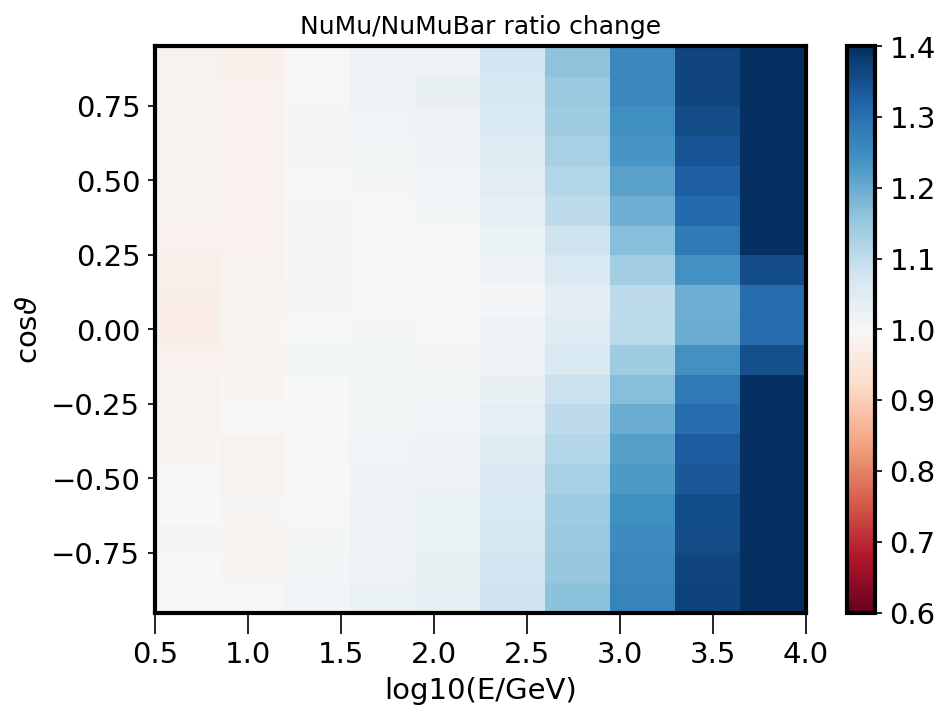

In [22]:
    fig = plt.figure(figsize=(6,4))
plt.figure(figsize=(7,5))
plt.title('NuMu/NuMuBar ratio change')
plt.pcolor(np.log10(loge), coszen, 
           ((myflux['numu']/myflux['antinumu'])/(honda['numu']/honda['antinumu'])).T,
          cmap='RdBu',vmin = 1-vrange, vmax=1.+vrange)
plt.colorbar()
plt.xlabel('log10(E/GeV)')
plt.ylabel(r'$\cos{\vartheta}$')

/home/jp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


Text(0, 0.5, '$\\cos{\\vartheta}$')

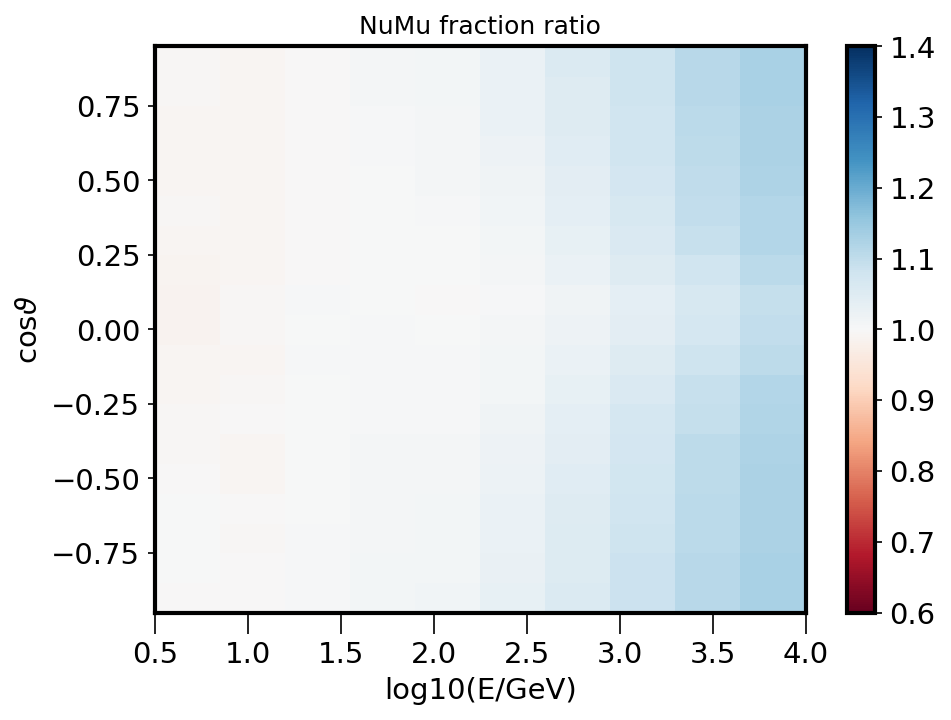

In [23]:
plt.figure(figsize=(7,5))
plt.title('NuMu fraction ratio')
plt.pcolor(np.log10(loge), coszen, 
           ((myflux['numu']/myflux['numuflux'])/(honda['numu']/honda['numuflux'])).T,
           cmap='RdBu',vmin = 1-vrange, vmax=1.+vrange)
plt.colorbar()
plt.xlabel('log10(E/GeV)')
plt.ylabel(r'$\cos{\vartheta}$')

In [24]:
flavor_dict = {'nue':r'$   \Phi^\mathrm{HKKMS}_{\nu_e} \;/\; \Phi^\mathrm{daemon}_{\nu_e}$',
              'antinue':r'$\Phi^\mathrm{HKKMS}_{\bar{\nu}_e}  \;/\;  \Phi^\mathrm{daemon}_{\bar{\nu}_e}$',
              'numu':r'$\Phi^\mathrm{HKKMS}_{\nu_\mu}  \;/\; \Phi^\mathrm{daemon}_{\nu_\mu}$',
              'antinumu':r'$\Phi^\mathrm{HKKMS}_{\bar{\nu}_\mu} \;/\; \Phi^\mathrm{daemon}_{\bar{\nu}_\mu}$',
              'nueflux':r'$\Phi^\mathrm{HKKMS}_{\nu_e + \bar{\nu}_e} \;/\; \Phi^\mathrm{daemon}_{\nu_e + \bar{\nu}_e}$',
              'numuflux':r'$\Phi^\mathrm{HKKMS}_{\nu_\mu + \bar{\nu}_\mu} \;/\; \Phi^\mathrm{daemon}_{\nu_\mu + \bar{\nu}_\mu}$',
              #'flavorratio':r'$(\Phi_{\nu_\mu + \bar{\nu}_\mu} / \Phi_{\nu_e + \bar{\nu}_e})^\mathrm{daemon}/(\Phi_{\nu_\mu + \bar{\nu}_\mu} / \Phi_{\nu_e + \bar{\nu}_e})^\mathrm{HKKMS}$',
              'flavorratio':r'$R_{\nu_\mu / \nu_e}^\mathrm{HKKMS}\;/\; R_{\nu_\mu/\nu_e}^\mathrm{daemon}$'
              }

1.103268998923902


/home/jp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


1.0706106763433543


/home/jp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


1.096137581151355


/home/jp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


1.0984999899341856


/home/jp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


1.0889934561193155


/home/jp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


1.097171722532966


/home/jp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


1


/home/jp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


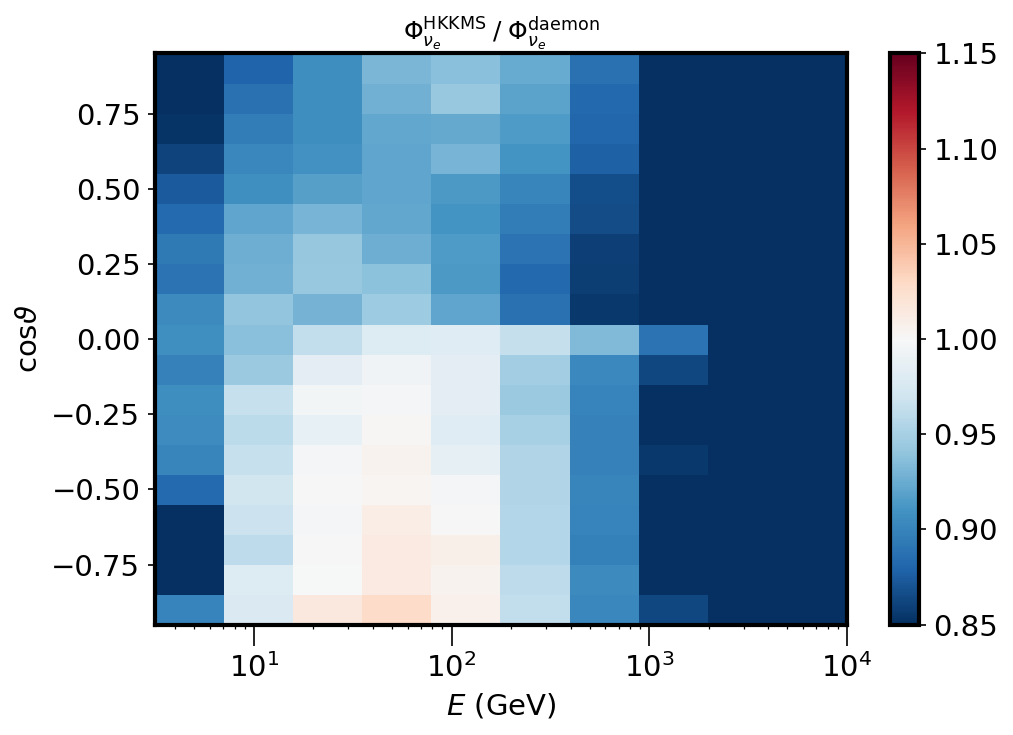

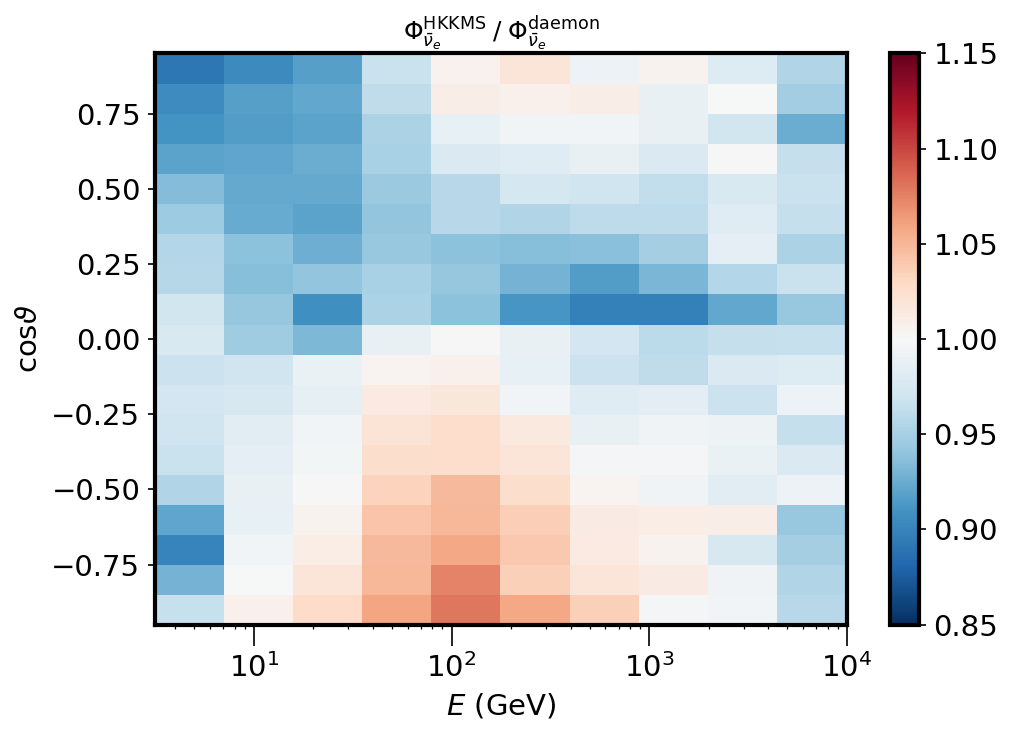

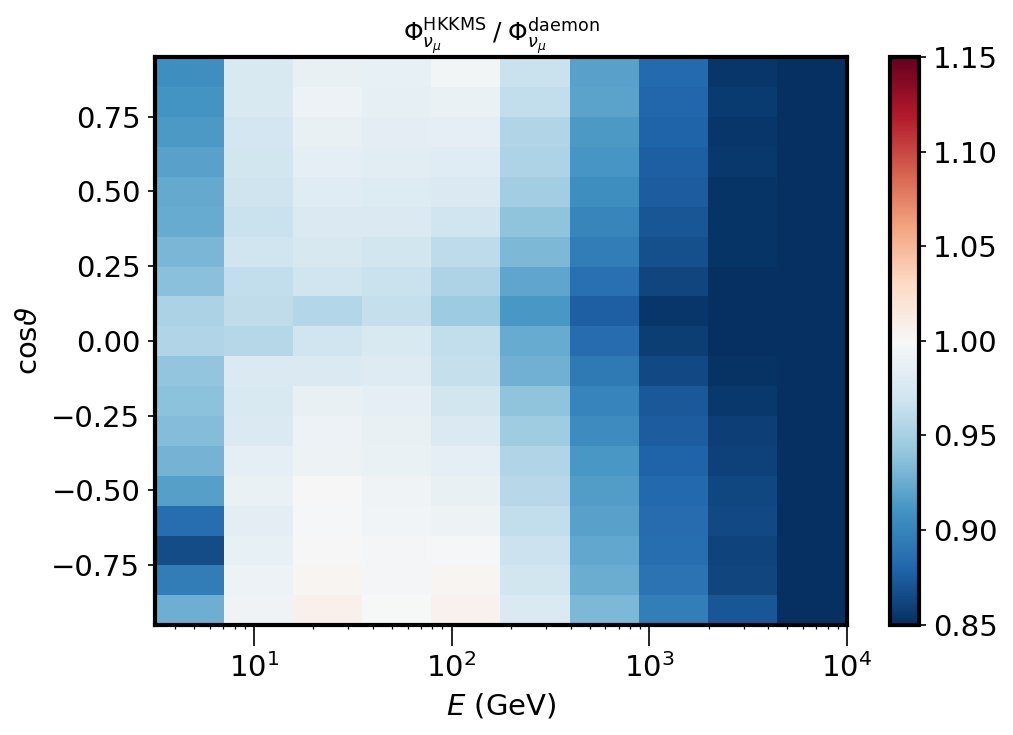

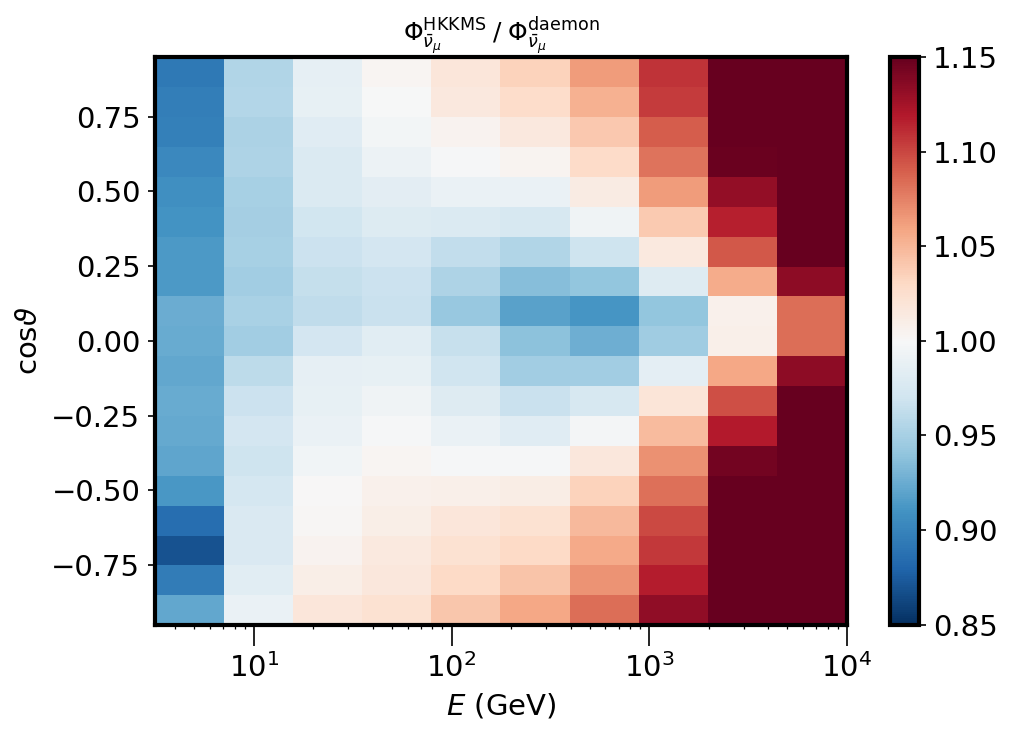

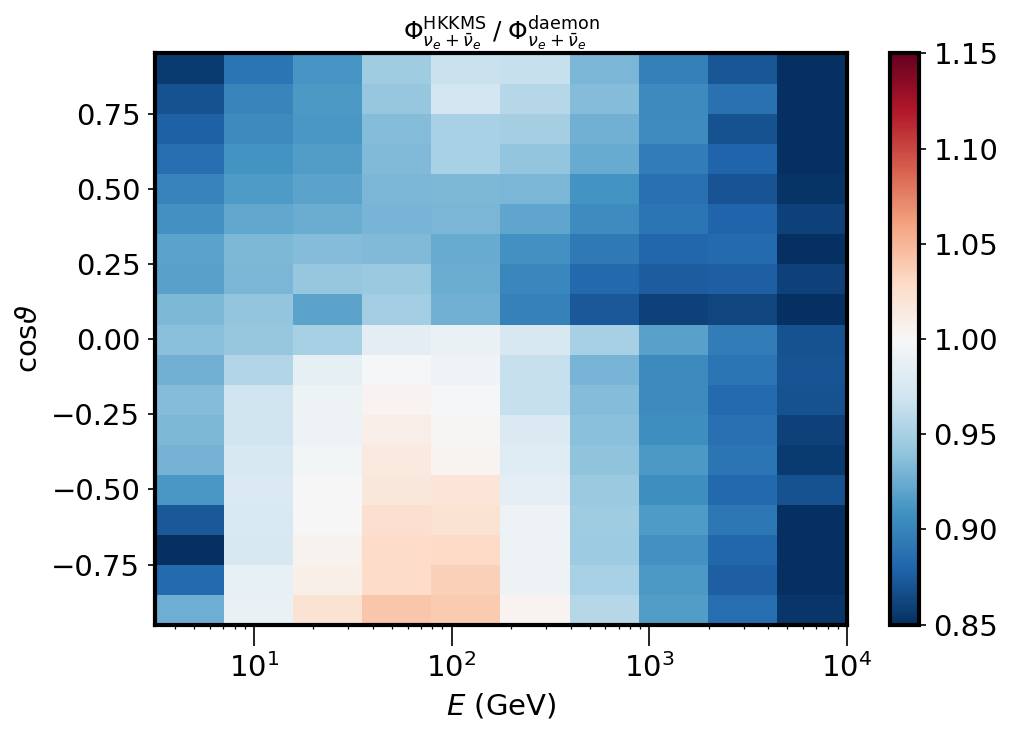

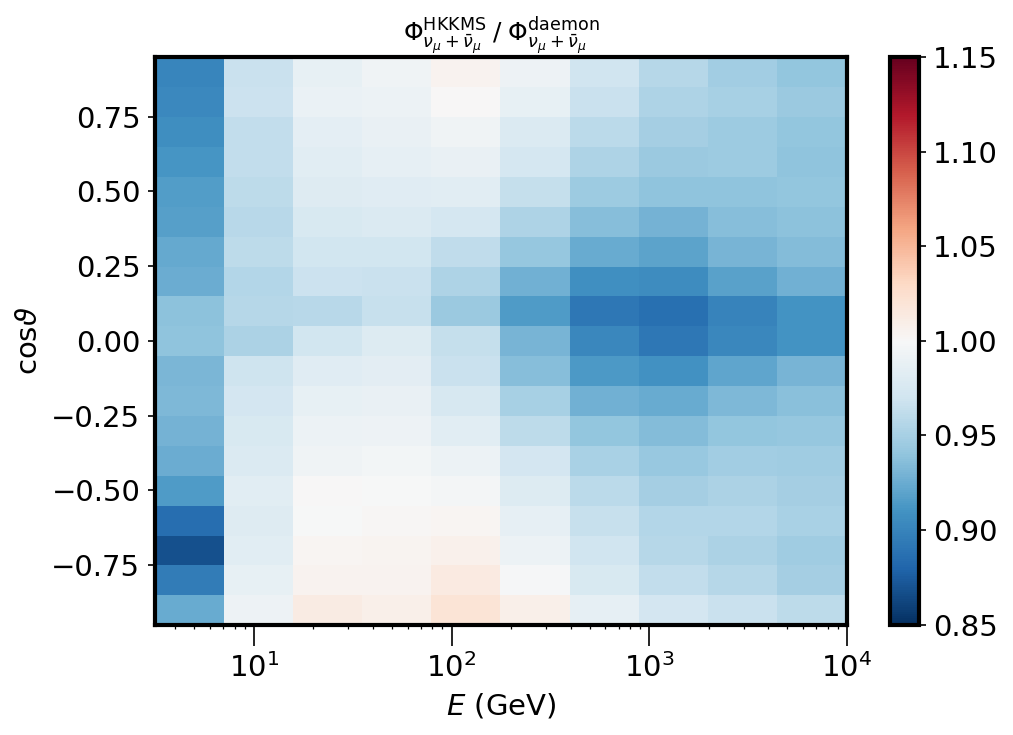

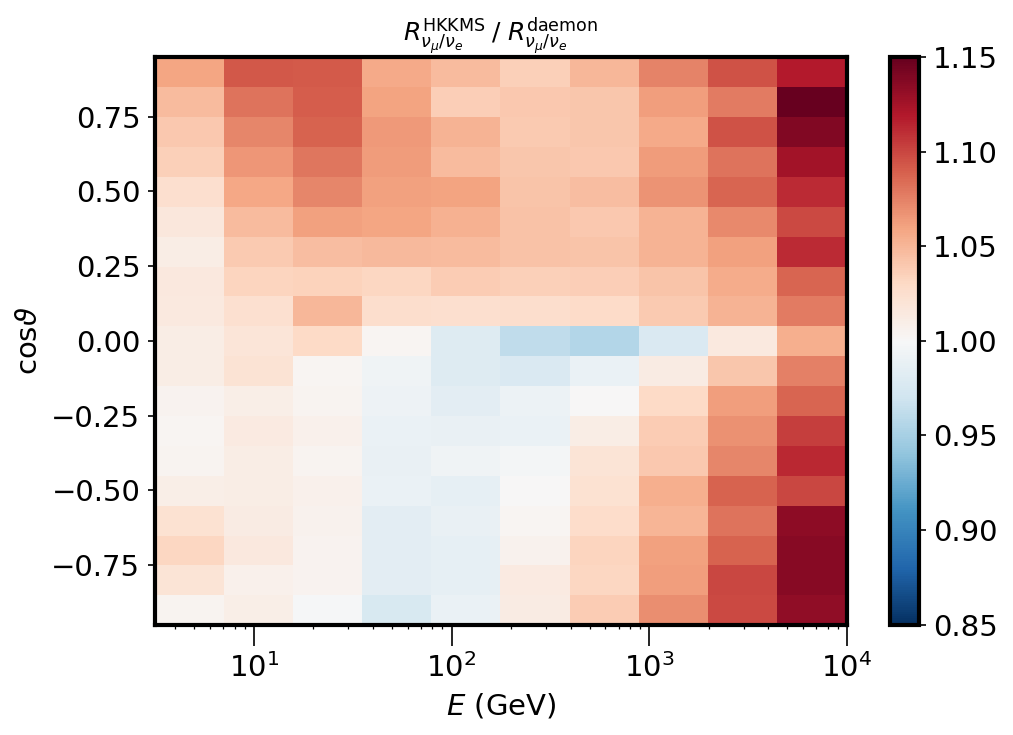

In [25]:
# Plots of ratios per flavor
vrange=0.15
for flavor in honda.keys():
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111)
    plt.title(flavor_dict[flavor])
    
    #norm_index = (9,4)
    norm_index = (4,2)
    #theratio = myflux[flavor].T/honda[flavor].T
    theratio = honda[flavor].T/myflux[flavor].T

    if flavor == 'flavorratio':
        this_norm = 1
    else:
        this_norm =  theratio[norm_index]
    print(this_norm)
    
    
    
    
    plt.pcolor(loge, coszen, theratio/this_norm,
               cmap='RdBu_r',vmin = 1-vrange, vmax=1.+vrange)
    plt.xscale('log')
    plt.colorbar()
    plt.xlabel(r'$E$ (GeV)')
    plt.ylabel(r'$\cos{\vartheta}$')
    plt.tight_layout()
    fig.savefig(os.path.join(outdir, 'PRD_2D_ratio_'+flavor+'_daemon_nd.png'),dpi=300)
    fig.savefig(os.path.join(outdir, 'PRD_2D_ratio_'+flavor+'_daemon_nd.pdf'))#,dpi=300)

(0.8, 1.2)

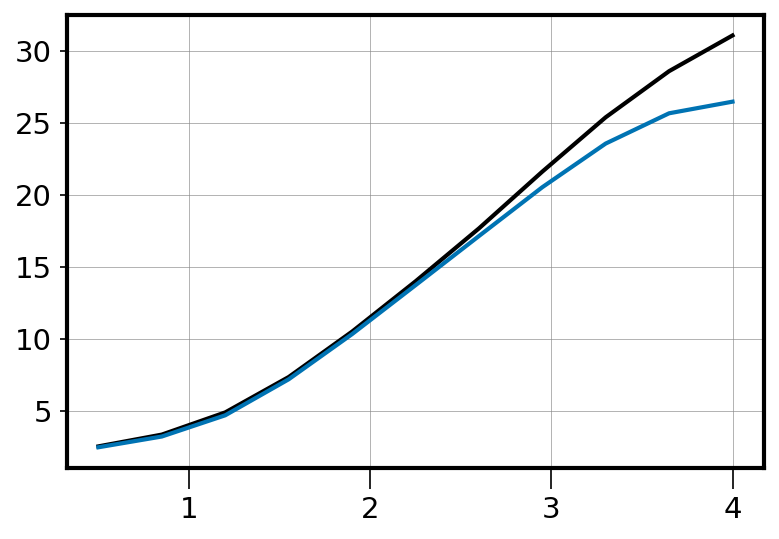

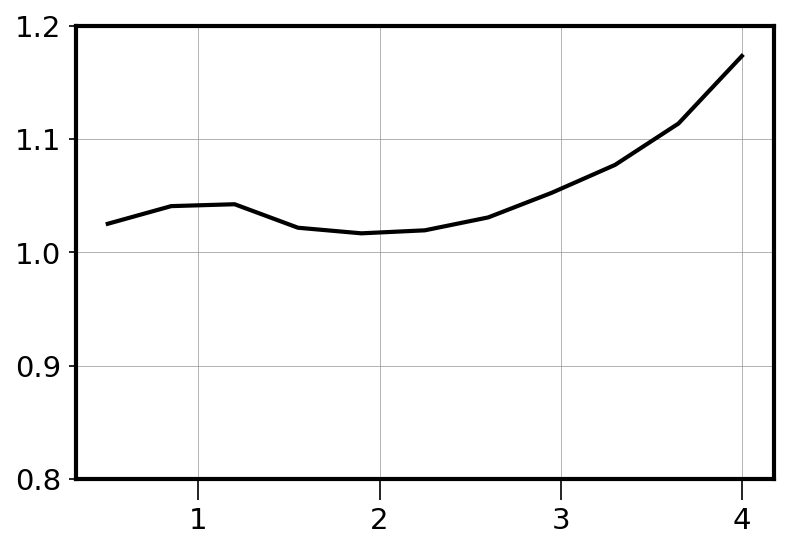

In [26]:
plt.figure()
plt.plot(np.log10(loge),honda['flavorratio'].mean(axis=1))
plt.plot(np.log10(loge),myflux['flavorratio'].mean(axis=1))

plt.figure()
plt.plot(np.log10(loge),honda['flavorratio'].mean(axis=1)/myflux['flavorratio'].mean(axis=1))
plt.ylim(0.8, 1.2)

(0.8, 1.2)

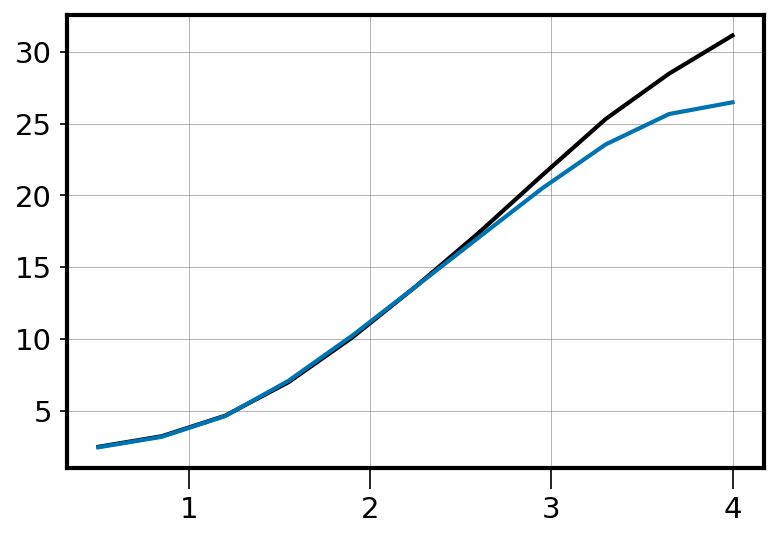

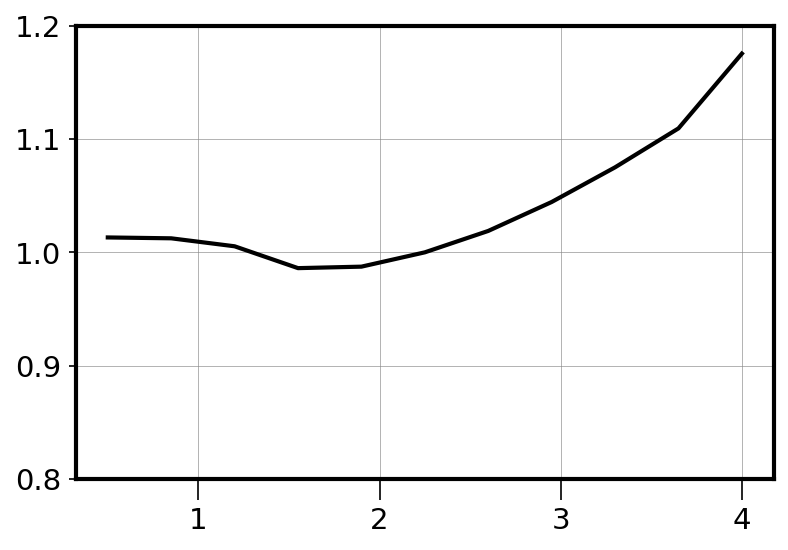

In [27]:
plt.figure()
plt.plot(np.log10(loge),honda['flavorratio'][:,:10].mean(axis=1))
plt.plot(np.log10(loge),myflux['flavorratio'][:,:10].mean(axis=1))

plt.figure()
plt.plot(np.log10(loge),honda['flavorratio'][:,:10].mean(axis=1)/
         myflux['flavorratio'][:,:10].mean(axis=1))
plt.ylim(0.8, 1.2)

In [28]:
honda['flavorratio'].shape
loge.shape

(11,)

### Extracting the normalization from NuMu

/home/jp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


Text(0, 0.5, '$\\cos{\\vartheta}$')

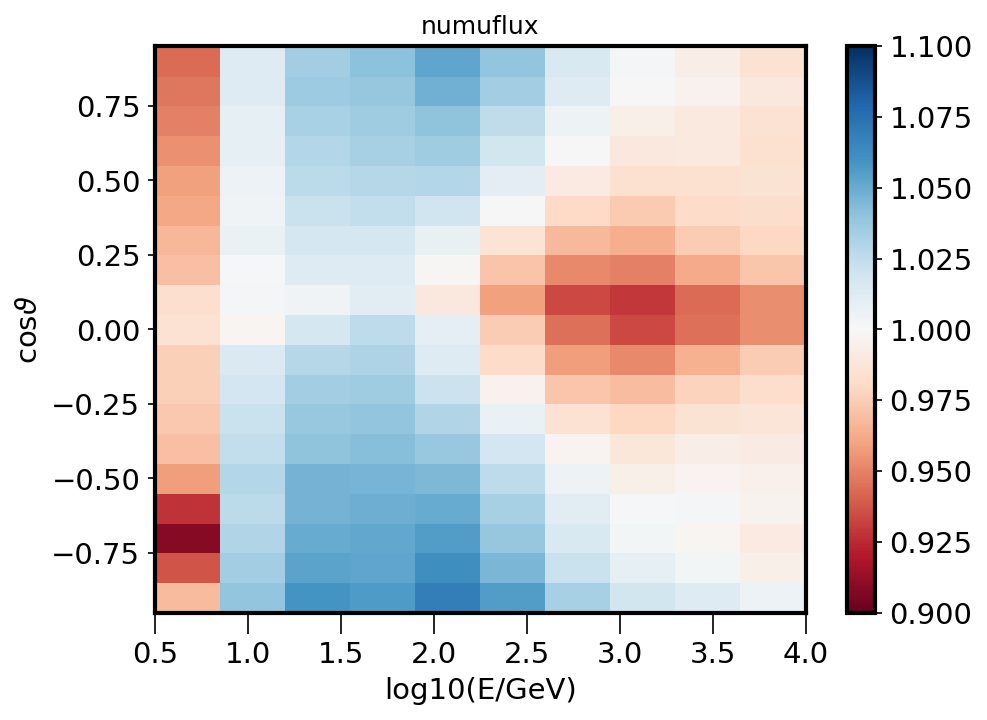

In [29]:
vrange = 0.1
flavor = 'numuflux'
norm = myflux[flavor].sum()/honda[flavor].sum()
plt.figure(figsize=(7,5))
plt.title(flavor)
# plt.pcolor(np.log10(loge), coszen, myflux[flavor].T/norm/honda[flavor].T,
#            cmap='RdBu',vmin = 1-vrange, vmax=1.+vrange)
plt.pcolor(np.log10(loge), coszen, honda[flavor].T/(myflux[flavor].T/norm),
           cmap='RdBu',vmin = 1-vrange, vmax=1.+vrange)
plt.colorbar()
plt.xlabel('log10(E/GeV)')
plt.ylabel(r'$\cos{\vartheta}$')

[3.16227766e+00 7.07945784e+00 1.58489319e+01 3.54813389e+01
 7.94328235e+01 1.77827941e+02 3.98107171e+02 8.91250938e+02
 1.99526231e+03 4.46683592e+03 1.00000000e+04]


Text(0, 0.5, 'Flux (a.u.)')

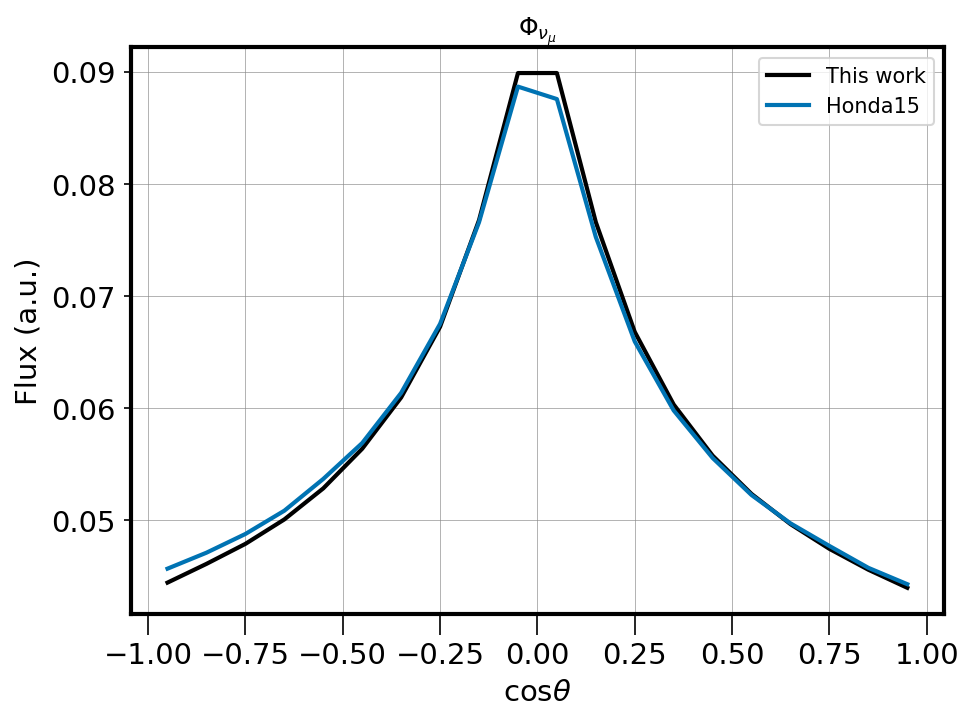

In [30]:
vrange = 0.1
print(loge)
ibin=2
flavor = 'numuflux'
norm = myflux[flavor].sum()/honda[flavor].sum()
plt.figure(figsize=(7,5))
plt.title(r'$\Phi_{\nu_\mu}$')
# plt.pcolor(np.log10(loge), coszen, myflux[flavor].T/norm/honda[flavor].T,
#            cmap='RdBu',vmin = 1-vrange, vmax=1.+vrange)

thiswork = myflux[flavor][ibin,:]
thishonda = honda[flavor][ibin,:]
norm = thiswork.sum()/thishonda.sum()

plt.plot(coszen, myflux[flavor][ibin,:]/norm, label='This work')
plt.plot(coszen, honda[flavor][ibin,:], label= 'Honda15')
plt.xlabel(r'$\cos\theta$')
plt.legend(loc=0)
plt.ylabel('Flux (a.u.)')

In [31]:
norm

0.9259647125041393

In [32]:
honda[flavor][:,ibin]/(myflux[flavor][:,ibin]/norm)

array([0.88168304, 0.99893694, 1.01841419, 1.02012563, 1.02398008,
       1.00748405, 0.98551905, 0.97271654, 0.96794072, 0.96144349,
       0.94859079])